# 랜덤 포레스트 (Random Forest)
---

랜덤 포레스트는 대표적인 배깅(bagging) 방식 앙상블 알고리즘으로 여러 개의 트리(분류기)를 만들어 보팅으로 최종 클래스 값을 결정하는 알고리즘입니다.

부스팅 기반의 다양한 앙상블 알고리즘과 마찬가지로 랜덤 포레스트 역시 트리 기반의 알고리즘으로 Decision Tree의 직관적이라는 장점을 그대로 가지고 있습니다.


배깅 방식 앙상블 모델인 랜덤 포레스트는 부스트래핑 분할 방식으로 각각의 트리가 각자의 데이터를 샘플링하여 개별적으로 학습을 진행한 후 모든 분류기가 보팅을 통해 예측을 결정합니다.

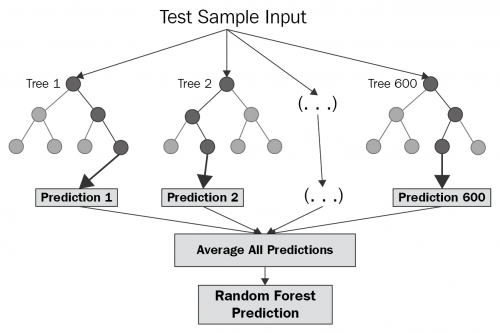

# Bootstrapping
---

부트스트래핑(bootsrtaping)이란 통계학에서 여러개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식을 의미합니다.

따라서 랜덤포레스트의 기반 트리가 학습하는 것은 임의로 샘플링된 중첩된 데이터입니다. 

**즉, 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 생성됩니다.**

`아래는 랜덤포레스트를 3개 Decision Tree 기반으로 생성했을 때(n_estimators=3) 생성되는 서브세트의 예시입니다.`

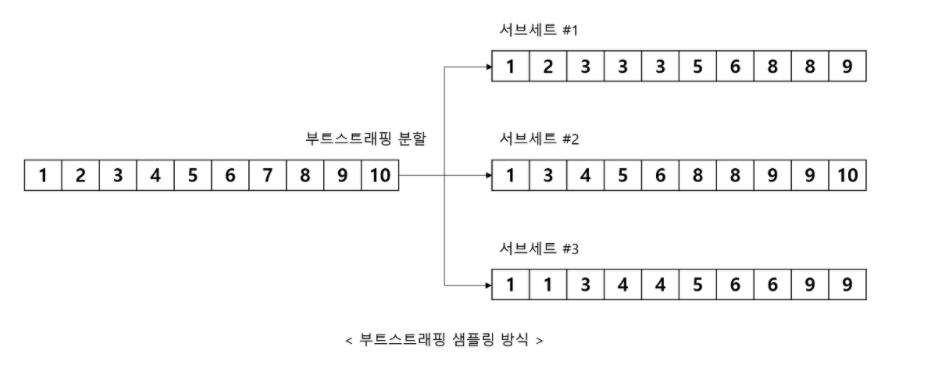

참고 ) 여기서 재미있는 사실은 Bootstrap Aggregating의 줄임말이 Bagging이라는 것입니다.

랜덤포레스트 모델에서 생성되는 트리들의 결정경계와 이들의 예측 확률을 평균내어 만든 결정경계를 시각적으로 확인해봅시다.

In [74]:
# two_moon 데이터셋을 이용해 트리 5개로 구성된 RandomForest 모델을 생성합니다.

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

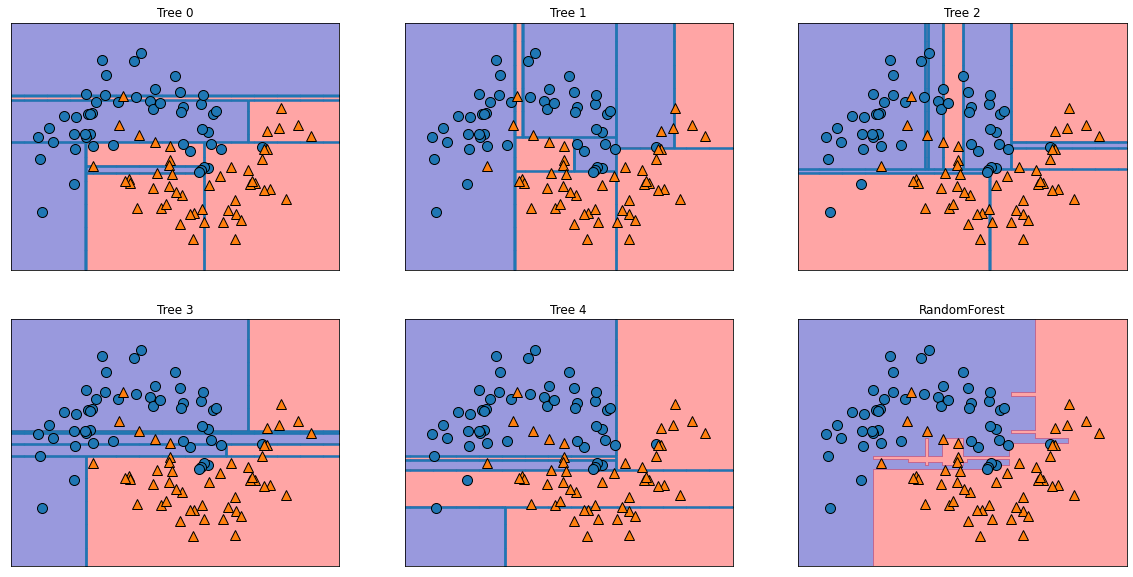

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("RandomForest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

랜덤포레스트는 부트스트래핑을 이용해 특정 트리에 나타나는 훈련 포인트가 다른 트리에 포함되지 않은 모습을 확인할 수 있습니다.

이 트리들의 예측 확률을 평균낸 랜덤포레스트의 결정경계는 각각의 트리보다 덜 과대적합된 좋은 결정 경계를 만들어줍니다. 

참조) https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-6-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC%EC%9D%98-%EC%95%99%EC%83%81%EB%B8%94/

# RandomForest를 이용한 위스콘신 유방암 데이터 분류
---

In [1]:
# 라이브러리 임포트
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# DecisionTree 분류기와 RandomForest 분류기 객체 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# 개별 모델 학습/예측/평가
estimators = [dt_clf, rf_clf]

for estimator in estimators:
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    class_name = estimator.__class__.__name__
    print('{} 분류기 정확도: {}'.format(class_name, accuracy_score(y_test, pred)))

DecisionTreeClassifier 분류기 정확도: 0.9385964912280702
RandomForestClassifier 분류기 정확도: 0.9649122807017544


일반 DecisionTree 분류기를 이용한 정확도보다 RandomForest 분류기의 정확도가 더 높은 예측 성능을 보입니다.

# RandomForest 하이퍼 파라미터 및 튜닝
---

* n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트는 10개, 결정 트리의 개수가 많으면 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 무조건 성능이 향상되지는 않습니다. 또한 트리의 갯수에 비례하여 학습 수행 시간이 증가합니다.


* max_features : 결정 트리에 사용된 max_features와 같습니다. RandomForest의 기본 max_features는 sqrt와 같으므로 전체 피처가 16개라면 분할을 위해 4개의 피처를 참조합니다. 추가적으로 max_features 값을 크게 하면 RandomForest의 트리들은 비슷해지고 가장 두드러진 특성을 이용해 데이터에 에 fit하게되며 이 값을 낮추면 트리들은 서로 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어집니다.

# GridSearchCV를 이용한 랜덤포레스트 하이퍼 파라미터 튜닝
---

In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[2 ,4 ,6, 8, 10, 12],
    'min_samples_leaf':[2 ,4, 6, 8, 12, 18],
    'min_samples_split':[2 ,4, 6, 8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs = -1 을 지정하면 모든 CPU 코어를 이용해 학습 가능
rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적의 하이퍼 파라미터 :',grid_cv.best_params_)
print('최적의 예측 정확도 :',grid_cv.best_score_)

최적의 하이퍼 파라미터 : {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최적의 예측 정확도 : 0.9582657083236725


튜닝 결과 최적의 파라미터는 위와 같고 평균 예측 정확도가 약 0.95로 측정됩니다.

이번에는 n_estimator를 더 늘려 튜닝해보겠습니다.

In [59]:
rf_clf2 = RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=2,
                                min_samples_split=2)
rf_clf2.fit(X_train, y_train)
pred = rf_clf2.predict(X_test)

print('예측 정확도 : ',accuracy_score(y_test, pred))

예측 정확도 :  0.9473684210526315


별도의 테스트 데이터에서 수행한 예측 정확도 수치는 약 94.7%로 측정됩니다. 

이번엔 FeatureImportance를 시각화 하여 알고리즘이 선택한 피처의 중요도를 확인해봅시다.

# Feature Importances
---

In [71]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<AxesSubplot:title={'center':'Feature Importances'}>

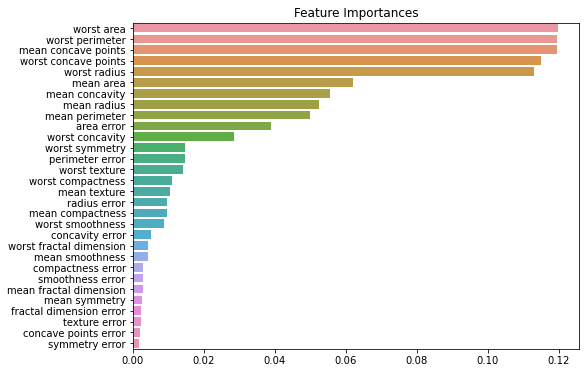

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=cancer.feature_names)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)

높은 피처 중요도를 가진 피처는 상위 5개 피처로 나타납니다.